In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib widget

In [3]:
pollen_test = pd.read_csv("data\\pollen_test.csv")
pollen_type = pd.read_csv("data\\pollen-type.csv")
pollen_train = pd.read_csv("data\\pollen_train.csv")
weather_data = pd.read_csv("data\\weather_data.csv")

In [4]:
ambrosia_concentrations = np.array(pollen_train['AMBROSIA'])
quercus_concentrations = np.array(pollen_train['QUERCUS'])

In [5]:
dates = list(pollen_train['date'])

In [6]:

from datetime import datetime, timedelta

def are_dates_adjacent(date1, date2):
    # Parse the date strings into datetime objects
    try:
        date1_obj = datetime.strptime(date1, '%Y-%m-%d')
        date2_obj = datetime.strptime(date2, '%Y-%m-%d')
    except ValueError:
        return False  # Return False if the date format is incorrect

    # Calculate the absolute difference between the two dates
    date_diff = abs((date1_obj - date2_obj).days)

    # Check if the dates are adjacent (one day apart)
    return date_diff == 1

In [7]:
def date_to_int(date_str):
    try:
        date_obj = datetime.strptime(date_str, '%Y-%m-%d')
        epoch = datetime(1970, 1, 1)
        days_since_epoch = (date_obj - epoch).days
        return days_since_epoch
    except ValueError:
        return None  # Return None if the date format is incorrect
    
def int_to_date(date_int):
    try:
        epoch = datetime(1970, 1, 1)
        date_obj = epoch + timedelta(days=date_int)
        return date_obj.strftime('%Y-%m-%d')
    except ValueError:
        return None  # Return None if the date format is incorrect

In [8]:
dates_num = np.array([date_to_int(date) for date in dates])

In [9]:
cnt = 0
locations = list(pollen_train['location'])
for i in range(len(dates)-1):
    if not are_dates_adjacent(dates[i], dates[i+1]) and locations[i] == locations[i+1]:
        print("Dates not adjacent: ", dates[i], dates[i+1], i)
        cnt += 1
print("Total number of non-adjacent dates: ", cnt)

Dates not adjacent:  2016-10-31 2016-11-02 1903
Dates not adjacent:  2019-01-07 2019-02-04 6033
Dates not adjacent:  2019-02-04 2019-02-10 6034
Dates not adjacent:  2019-02-07 2019-02-10 6305
Dates not adjacent:  2019-02-12 2019-02-17 6308
Dates not adjacent:  2019-09-15 2019-09-23 6519
Dates not adjacent:  2019-03-30 2019-04-01 6616
Dates not adjacent:  2019-10-06 2019-10-14 6805
Dates not adjacent:  2019-10-27 2019-11-04 6819
Dates not adjacent:  2019-02-04 2019-02-11 6827
Dates not adjacent:  2019-02-25 2019-02-27 6842
Dates not adjacent:  2019-07-01 2019-07-03 6967
Dates not adjacent:  2019-08-18 2019-09-04 7014
Dates not adjacent:  2019-02-23 2019-02-25 7089
Dates not adjacent:  2020-03-09 2020-04-14 7607
Dates not adjacent:  2020-04-14 2020-05-12 7608
Dates not adjacent:  2020-06-22 2020-07-14 7650
Dates not adjacent:  2020-06-06 2020-06-08 7880
Dates not adjacent:  2020-10-16 2020-10-19 8011
Dates not adjacent:  2020-01-27 2020-01-29 8026
Dates not adjacent:  2020-01-29 2020-02-

neki datumi nisu jedan do drugog (njih 36)

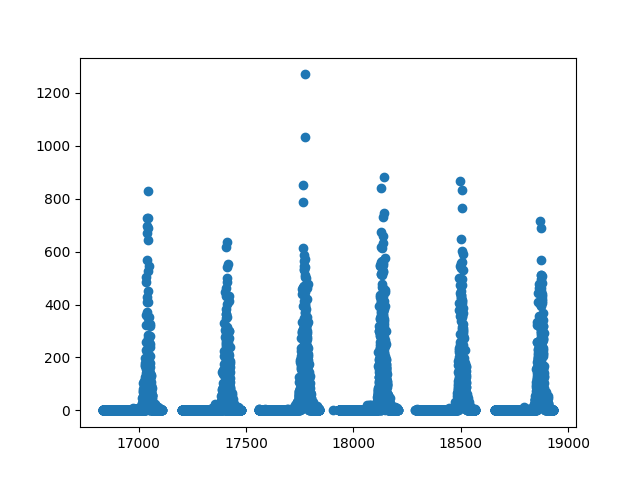

In [10]:
plt.scatter(dates_num, ambrosia_concentrations)

In [11]:
import numpy as np
from scipy.signal import find_peaks

peaks, _ = find_peaks(ambrosia_concentrations, height=600)
plt.scatter(dates_num, ambrosia_concentrations)
plt.scatter(dates_num[peaks], ambrosia_concentrations[peaks], c='r')
len(peaks)

21

In [12]:
for d in dates_num[peaks]:
    print(int_to_date(int(d)))

2016-08-30
2016-08-27
2016-08-30
2017-08-29
2017-09-01
2018-08-22
2018-08-24
2018-09-02
2019-08-19
2019-08-22
2019-08-22
2019-09-03
2019-08-28
2019-09-02
2020-08-25
2020-08-27
2020-09-01
2020-08-30
2020-08-30
2021-09-01
2021-09-06


Ambrozija klija na godinu dana, kraj avgusta - početak septembra

## Ispitivanje uticaja vremena

In [13]:
# drop rows that contain all nan
weather_data_filt = weather_data.dropna(how='all', subset=[col for col in weather_data.columns if col not in ['Unnamed: 0', 'location', 'date']])

In [14]:
dates_temp = list(weather_data_filt['date'])
tavg = np.array(weather_data_filt['tavg'])
dates_temp = np.array([date_to_int(date) for date in dates_temp])

idx = []
for i in range(len(tavg)):
    if tavg[i] < 25.5 and tavg[i] > 24.5:
        idx.append(i)

In [15]:
plt.figure(1)
plt.scatter(dates_temp[idx], tavg[idx])

plt.scatter(dates_num[peaks], ambrosia_concentrations[peaks], c='r')

Kad god je prosečna temperatura 25 stepeni ambrozija je na vrhuncu <br>
Sofija našla ovo:<br>
"procenat klijavosti A. artemisiifolia je bio najveći pri temperaturi od 250C (30%), a najmani pri temperaturi od 400C (2,08%), dok na temperaturama od 5 i 100C seme nije klijalo. Stopa klijavosti je bila najveća na temperaturi od 300C (7,84 klijalih semena/dan), a najmanja na temperaturi od 400C (0,7 klijalih semena/dan)"

## Koncentracija po gradovima

In [16]:
# unique elements in list locations

locations_unique = list(set(locations))
amb_conc_by_loc = {}
date_by_loc = {}
for loc in locations_unique:
    amb_conc_by_loc[loc] = np.array(pollen_train[pollen_train['location'] == loc]['AMBROSIA'])
    dates = list(pollen_train[pollen_train['location'] == loc]['date'])
    dates = np.array([date_to_int(date) for date in dates])
    date_by_loc[loc] = dates

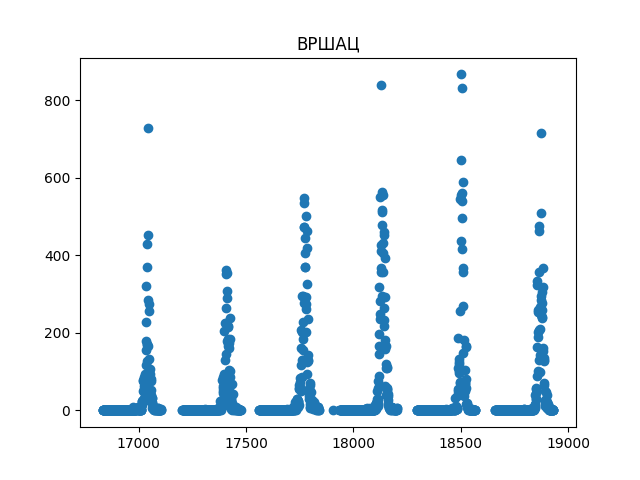

In [17]:
for loc in locations_unique:
    plt.figure()
    plt.scatter(date_by_loc[loc], amb_conc_by_loc[loc])
    plt.title(loc)
    break